In [1]:
# latihan dengan menggunakan model SVR
import pandas as pd

df = pd.read_csv('dataset/Salary_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
# memisahkan antar atribut dengan label

x = df['YearsExperience']
y = df['Salary']

## ketika hanya terdapat 1 atribut pada data frame maka harus mengubah bentukanya dengan lib numpy
# mengubah bentuk
import numpy as np
x = x[:,np.newaxis]


<ipython-input-9-bfddfeccc632>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


In [11]:
from sklearn.svm import SVR
# membangun model dengan parameter c ,gamma dan kernel
model = SVR(C = 1000, gamma=0.05, kernel='rbf')

# melatih data dengan model
model.fit(x,y)

SVR(C=1000, gamma=0.05)

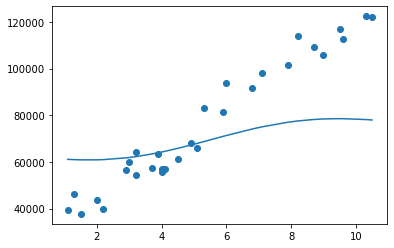

In [13]:
# visualisasikan model 
import matplotlib.pyplot as plt 

plt.scatter(x,y)
plt.plot(x, model.predict(x))

In [16]:
# memperbaiki ^^ dengan teknik GRID SEARCH
import pandas as pd
df = pd.read_csv('dataset/Salary_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [18]:
# memisahkan atribut
x = df['YearsExperience']
# memisahkan label
y = df['Salary']

# mengubah bentuk atribut
import numpy as np
x = x[:,np.newaxis]


<ipython-input-18-7fa2bebe7de5>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


In [21]:
## mengimport lib GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membuat object
model = SVR()

# membuat dictionary berisi parameter model SVR
parameter = {
    'kernel': ['rbf'],
    'C': [1000,10000,100000],
    'gamma': [0.5,0.05,0.005],
}

grid_search = GridSearchCV(model,parameter)

# melakukan pelatihan model dengan fungsi fit
grid_search.fit(x,y)

# menampilkan pemilihan parameter terbaik
grid_search.best_params_

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}

In [23]:
# masukan hasil best params ke model SVR baru
model_baru = SVR(C= 100000, gamma=0.005, kernel='rbf')

## melakukan pelatihan pada data
model_baru.fit(x,y)

SVR(C=100000, gamma=0.005)

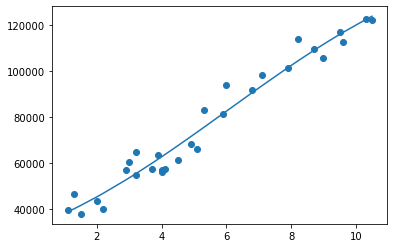

In [25]:
## visualisasi kembali  data diatas
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x, model_baru.predict(x))